# NBA Data Project

*Chris Patel*

## Preliminaries

The dataset and its description are both in the `data` folder. For this project you'll need `numpy`, `pandas`, and either `matplotlib` or `seaborn` for visualization. 

In the next cell, make your imports and load the dataset:

In [1]:
# Imports and loading the dataset
import numpy as mp
import pandas as pd
import matplotlib as plt
import seaborn as sns

nba = pd.read_csv('data/nba_data.csv')

## Exploration

Use `.head()` and `.info()` to ensure that the data was loaded correctly and to get a feel for the data types in each column. Use `.describe()` to check whether or not there are any extreme values that don't make sense (*e.g. Can someone play negative minutes or score negative points? Can someone play a million minutes when there are only 48 minutes per game and 82 games in a season?*)

In [2]:
# Exploring the dataset
nba.head()
nba.info()
nba.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679 entries, 0 to 678
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rk                 679 non-null    int64  
 1   Player             679 non-null    object 
 2   Pos                679 non-null    object 
 3   Age                679 non-null    int64  
 4   Tm                 679 non-null    object 
 5   G                  679 non-null    int64  
 6   GS                 679 non-null    int64  
 7   MP                 679 non-null    int64  
 8   FG                 679 non-null    int64  
 9   FGA                679 non-null    int64  
 10  FG%                676 non-null    float64
 11  3P                 679 non-null    int64  
 12  3PA                679 non-null    int64  
 13  3P%                655 non-null    float64
 14  2P                 679 non-null    int64  
 15  2PA                679 non-null    int64  
 16  2P%                672 non

,Rk,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,676.000000,679.000000,679.000000,...,642.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000
mean,265.976436,26.025037,43.338733,20.069219,984.421208,169.387334,357.377025,0.464241,50.795287,140.606775,...,0.752586,42.156112,133.879234,176.035346,102.970545,29.698085,18.718704,54.263623,81.194404,463.219440
std,154.956296,4.325709,24.727306,25.766359,800.236331,169.157722,350.737612,0.112790,57.218086,151.702365,...,0.150094,49.187520,130.378234,172.793776,122.358385,27.079014,24.584790,55.433154,64.056510,471.423224
min,1.000000,19.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,132.500000,23.000000,22.000000,0.000000,266.500000,36.000000,79.000000,0.415000,4.500000,16.500000,...,0.686500,9.000000,32.000000,45.000000,18.000000,7.000000,4.000000,12.000000,26.000000,95.500000
50%,264.000000,25.000000,45.000000,6.000000,797.000000,108.000000,237.000000,0.454000,30.000000,89.000000,...,0.769000,27.000000,94.000000,126.000000,57.000000,22.000000,11.000000,36.000000,68.000000,291.000000
75%,399.500000,29.000000,65.500000,36.500000,1663.500000,253.500000,529.000000,0.506000,77.000000,218.000000,...,0.844750,57.000000,196.500000,260.500000,137.500000,45.000000,24.500000,81.000000,123.000000,689.000000
max,539.000000,42.000000,83.000000,83.000000,2963.000000,728.000000,1559.000000,1.000000,301.000000,731.000000,...,1.000000,274.000000,744.000000,973.000000,741.000000,128.000000,193.000000,300.000000,279.000000,2225.000000


## Data Cleaning

- The `Rk` and `Player-additional` columns won't be useful to us. Delete them.
- There are several columns with null entries; deal with them appropriately:
    - Is it reasonable for null entries to exist in these columns?
    - Do we need to replace the null values with some other value?

In [3]:
# Cleaning the dataset
nba.drop(columns = "Rk", inplace = True)
nba.drop(columns = "Player-additional", inplace = True)
nba.fillna(0)
nba.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Precious Achiuwa,C,23,TOR,55,12,1140,196,404,0.485,...,0.702,100,228,328,50,31,30,59,102,508
1,Steven Adams,C,29,MEM,42,42,1133,157,263,0.597,...,0.364,214,271,485,97,36,46,79,98,361
2,Bam Adebayo,C,25,MIA,75,75,2598,602,1114,0.540,...,0.806,184,504,688,240,88,61,187,208,1529
3,Ochai Agbaji,SG,22,UTA,59,22,1209,165,386,0.427,...,0.812,43,78,121,67,16,15,41,99,467
4,Santi Aldama,PF,22,MEM,77,20,1682,247,525,0.470,...,0.750,85,286,371,97,45,48,60,143,696


## Data Augmentation

While the stats included in the dataset are useful for giving us a wide view of a player's contributions throughout the season, basketball fans and analysts have devised more advanced tools to more accurately quantify these contributions. You can look up any of these statistics to see how they're calculated

Add the following statistics as new columns to the dataframe (suggested column name in parentheses):
- Points per shot (PPS)
- Points per possession (PPP)
- True Shooting Percentage (TS%)
- Free Throw Rate (FTR)
- Assist-to-Turnover Ratio (ATO)
- Hollinger Assist Ratio (hAST%)

In [4]:
# Adding Additional Analytics
two = nba["2P"]*2
three = nba["3P"]*3

nba["PPS"] = nba("three" + "two") / (nba["3PA"] + nba["2PA"])
nba["PPP"] = nba["PTS"] / (nba["FGA"] + nba["TOV"] + (0.44 * nba["FTA"]))
nba["TS%"] = (nba["PTS"] * 0.5) / (nba["FGA"] + nba["FTA"] * 0.425)
nba["FTR"] = nba["FT"] / nba["FGA"]
nba["ATO"] = nba["AST"] / nba["TOV"]
nba["hAST%"] = (nba["AST"]) / (nba["FGA"] + (0.425 * nba["FTA"]) + nba["AST"] + nba["TOV"])

TypeError: 'DataFrame' object is not callable

### Team-Contextual Analytics
Understanding a player's value in the context of their *team* is also an important consideration. For example, could a given player be scoring more points simply because they're playing next to a superstar who commands more defensive attention? Is a given center grabbing lots of defensive rebounds because they're skilled, or because their teammates are forcing more bad shots? The following statistics are a bit more difficult to calculate, but may yield better insight about a player's *context* within his team:

- Rebound Rate (TRB%)
- Usage Percentage (USG%)

For these stats you'll need to calculate *team* totals. I recommend creating a pivot table called `team_totals` that aggregates the sum of each column in your original dataset on a per team basis. Then when you need to use a player's team totals, you can look at the appropriate row/column of the `team_totals` dataframe. 

In [ ]:
# Team-Contextual Analytics
team_totals = nba.groupby("Tm").sum().reset_index()
nba["USG%"] = ((nba ["FGA"] + 0.44 * nba["FTA"] + nba["TOV"]) / (team_totals["FGA"] + 0.44 * team_totals["FTA"] + team_totals["TOV"])) * 100

## Querying the Data

### Simple Lookups
Display the top five players in the league for the following stats: minutes, points, free-throw attempts, 3-pointers made, and assists (For each of these statistics, number 1 should be the *biggest*). 

Do these lists make sense? (If you're not sure, check with a friend who's into basketball, they'll help!)

In [ ]:
MMP = nba [["MP"]].sort_values(by = "MP", ascending = False).head(5)
MPT = nba [["PTS"]].sort_values(by = "PTS", ascending = False).head(5)
MFTA = nba [["FTA"]].sort_values(by = "FTA", ascending = False).head(5)
TPM = nba [["3P"]].sort_values(by = "3P", ascending = False).head(5)
MATS = nba [["AST"]].sort_values(by = "AST", ascending = False).head(5)

### More Complex Lookups

- Print out the positions in order of highest average points per player to lowest points per player.
- Repeat the previous question for average blocks per player, per position.
- Determine the league's top scorers in terms of *points per minute* among players who have played at least half their team's total minutes. 

In [ ]:
appr = nba.groupby("Pos")[["PTS"]].mean().sort_values(by = "Pos", ascending = False)
abpr = nba.groupby("Pos")[["BLK"]].mean().sort_values(by = "Pos", ascending = False)

nba["PPM"] = nba["PTS"]/nba["MP"]
filter = nba[nba['MP'] >= 24]
tppm = filter.sort_values("PPM", ascending = False)
tppm[['Player', "PPM"]]

,Player,PPM
12,Giannis Antetokounmpo,0.967885
184,Joel Embiid,0.955779
160,Luka Dončić,0.894187
373,Damian Lillard,0.885619
209,Shai Gilgeous-Alexander,0.883692
...,...,...
65,Leandro Bolmaro,0.088235
211,Jacob Gilyard,0.073171
460,Nerlens Noel,0.069767
164,Devon Dotson,0.056604


## Visualizing the Data

- Create a heatmap that shows the number of players in each *quintile* of points scored at each position (this should be a 5x5 heatmap)
- Create a scatter plot that shows players' total points on the y axis vs minutes on the x axis. Draw a trendline fit to the data. What does that trendline represent?

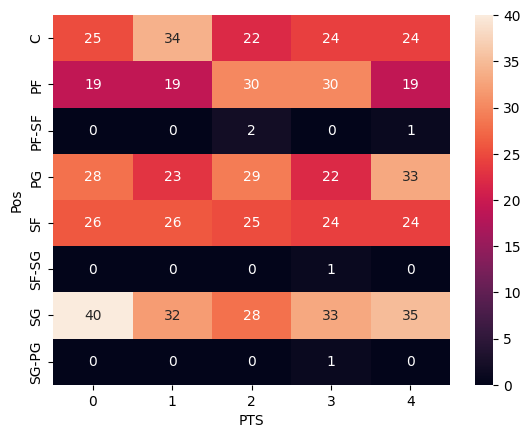

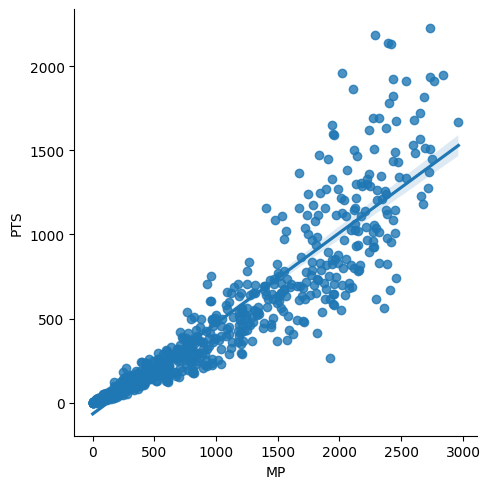

In [7]:
quintile = pd.qcut(nba["PTS"], q = 5, labels = False)
nba_hm = nba.pivot_table(nba, index = "Pos", columns = quintile, aggfunc = "size", fill_value = 0)
sns.heatmap(nba_hm, annot = True)

sns.lmplot(data = nba, x = "MP", y = "PTS")